## Final Project Submission


* Student name: Mark Ehler
* Student pace: Part time
* Scheduled project review date/time: 12:00 3/25/2019
* Instructor name: Jeff Herman
* Blog post URL: 
* Presentation Link: 


The goal of your project is to query the database to get the data needed to perform a statistical analysis. In this statistical analysis, you'll need to perform a hypothesis test (or perhaps several) to answer the following question:

*Do discounts have a statistically significant effect on the number of products customers order? If so, at what level(s) of discount?*

In addition to answering this question with a hypothesis test, you will also need to come up with at least 3 other hypotheses to test on your own. These can by anything that you think could be imporant information for the company.

For this hypothesis, be sure to specify both the null hypothesis and the alternative hypothesis for your question. You should also specify if this is one-tail or a two-tail test.

In [3]:
!dir /b

.gitignore
.ipynb_checkpoints
.learn
adventureworks2008_schema.gif
CONTRIBUTING.md
halfway-there.gif
index.ipynb
LICENSE.md
Mod 2 Final.ipynb
Northwind_ERD.png
Northwind_small.sqlite
README.md


In [4]:
import sqlite3 as sql
import pandas as pd

In [5]:

# Create the connection
cnx = sql.connect(r'Northwind_small.sqlite')

c = cnx.cursor()


In [6]:
c.execute(''' select name from sqlite_master where type = 'table';''')

tables = c.fetchall()
tables

[('Employee',),
 ('Category',),
 ('Customer',),
 ('Shipper',),
 ('Supplier',),
 ('Order',),
 ('Product',),
 ('OrderDetail',),
 ('CustomerCustomerDemo',),
 ('CustomerDemographic',),
 ('Region',),
 ('Territory',),
 ('EmployeeTerritory',)]

In [7]:
#My best single guess at finding NULL values if there are any.
#Tests for NULLs and NaNs will continue throughout this notebook, along with sanity checks.
c.execute('''select * from Product where CategoryId is null''')
c.fetchall()

[]

In [8]:
c.execute(''' select * from OrderDetail;''')

c.fetchall()

[('10248/11', 10248, 11, 14, 12, 0.0),
 ('10248/42', 10248, 42, 9.8, 10, 0.0),
 ('10248/72', 10248, 72, 34.8, 5, 0.0),
 ('10249/14', 10249, 14, 18.6, 9, 0.0),
 ('10249/51', 10249, 51, 42.4, 40, 0.0),
 ('10250/41', 10250, 41, 7.7, 10, 0.0),
 ('10250/51', 10250, 51, 42.4, 35, 0.15),
 ('10250/65', 10250, 65, 16.8, 15, 0.15),
 ('10251/22', 10251, 22, 16.8, 6, 0.05),
 ('10251/57', 10251, 57, 15.6, 15, 0.05),
 ('10251/65', 10251, 65, 16.8, 20, 0.0),
 ('10252/20', 10252, 20, 64.8, 40, 0.05),
 ('10252/33', 10252, 33, 2, 25, 0.05),
 ('10252/60', 10252, 60, 27.2, 40, 0.0),
 ('10253/31', 10253, 31, 10, 20, 0.0),
 ('10253/39', 10253, 39, 14.4, 42, 0.0),
 ('10253/49', 10253, 49, 16, 40, 0.0),
 ('10254/24', 10254, 24, 3.6, 15, 0.15),
 ('10254/55', 10254, 55, 19.2, 21, 0.15),
 ('10254/74', 10254, 74, 8, 21, 0.0),
 ('10255/2', 10255, 2, 15.2, 20, 0.0),
 ('10255/16', 10255, 16, 13.9, 35, 0.0),
 ('10255/36', 10255, 36, 15.2, 25, 0.0),
 ('10255/59', 10255, 59, 44, 30, 0.0),
 ('10256/53', 10256, 53, 26.2,

In [9]:
test = pd.read_sql_query('''select * from Category;''', cnx)
test[:2]

,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."


In [10]:
c.execute(''' select * from 'Order';''')

c.fetchall()

[(10248,
  'VINET',
  5,
  '2012-07-04',
  '2012-08-01',
  '2012-07-16',
  3,
  32.38,
  'Vins et alcools Chevalier',
  "59 rue de l'Abbaye",
  'Reims',
  'Western Europe',
  '51100',
  'France'),
 (10249,
  'TOMSP',
  6,
  '2012-07-05',
  '2012-08-16',
  '2012-07-10',
  1,
  11.61,
  'Toms Spezialitäten',
  'Luisenstr. 48',
  'Münster',
  'Western Europe',
  '44087',
  'Germany'),
 (10250,
  'HANAR',
  4,
  '2012-07-08',
  '2012-08-05',
  '2012-07-12',
  2,
  65.83,
  'Hanari Carnes',
  'Rua do Paço, 67',
  'Rio de Janeiro',
  'South America',
  '05454-876',
  'Brazil'),
 (10251,
  'VICTE',
  3,
  '2012-07-08',
  '2012-08-05',
  '2012-07-15',
  1,
  41.34,
  'Victuailles en stock',
  '2, rue du Commerce',
  'Lyon',
  'Western Europe',
  '69004',
  'France'),
 (10252,
  'SUPRD',
  4,
  '2012-07-09',
  '2012-08-06',
  '2012-07-11',
  2,
  51.3,
  'Suprêmes délices',
  'Boulevard Tirou, 255',
  'Charleroi',
  'Western Europe',
  'B-6000',
  'Belgium'),
 (10253,
  'HANAR',
  3,
  '2012-07

In [11]:
c.execute(''' select * from Customer;''')

c.fetchall()

[('ALFKI',
  'Alfreds Futterkiste',
  'Maria Anders',
  'Sales Representative',
  'Obere Str. 57',
  'Berlin',
  'Western Europe',
  '12209',
  'Germany',
  '030-0074321',
  '030-0076545'),
 ('ANATR',
  'Ana Trujillo Emparedados y helados',
  'Ana Trujillo',
  'Owner',
  'Avda. de la Constitución 2222',
  'México D.F.',
  'Central America',
  '05021',
  'Mexico',
  '(5) 555-4729',
  '(5) 555-3745'),
 ('ANTON',
  'Antonio Moreno Taquería',
  'Antonio Moreno',
  'Owner',
  'Mataderos  2312',
  'México D.F.',
  'Central America',
  '05023',
  'Mexico',
  '(5) 555-3932',
  None),
 ('AROUT',
  'Around the Horn',
  'Thomas Hardy',
  'Sales Representative',
  '120 Hanover Sq.',
  'London',
  'British Isles',
  'WA1 1DP',
  'UK',
  '(171) 555-7788',
  '(171) 555-6750'),
 ('BERGS',
  'Berglunds snabbköp',
  'Christina Berglund',
  'Order Administrator',
  'Berguvsvägen  8',
  'Luleå',
  'Northern Europe',
  'S-958 22',
  'Sweden',
  '0921-12 34 65',
  '0921-12 34 67'),
 ('BLAUS',
  'Blauer See 

In [12]:
products = pd.read_sql_query("SELECT * FROM Product", cnx)
products[:3]

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.0,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.0,13,70,25,0


# Discounts

### H1:  Discounts have a significant increase on the number of products a customer orders to the 95% confidence level. orders with discounts sales price >= sales price orders without discounts

### H0: There is no increase in the number of products a customer will buy if they use discounts.  Orders with discounts total price = price of orders without discounts
    
This is a one tailed test and the alpha is set at 0.1

if we fail to accept the null, which discount is statistically significant and at what lv? 1% 10% 25% etc.

Add a visualization.
we dont reject the null.  We fail to accept it.

In [13]:
tables

[('Employee',),
 ('Category',),
 ('Customer',),
 ('Shipper',),
 ('Supplier',),
 ('Order',),
 ('Product',),
 ('OrderDetail',),
 ('CustomerCustomerDemo',),
 ('CustomerDemographic',),
 ('Region',),
 ('Territory',),
 ('EmployeeTerritory',)]

In [14]:
#Order Details. {0:OrderID, 1:ProductID. 2:UnitPrice, 3:Quantity, 4:Discount}
c.execute('''select * from OrderDetail''')
c.fetchall()

[('10248/11', 10248, 11, 14, 12, 0.0),
 ('10248/42', 10248, 42, 9.8, 10, 0.0),
 ('10248/72', 10248, 72, 34.8, 5, 0.0),
 ('10249/14', 10249, 14, 18.6, 9, 0.0),
 ('10249/51', 10249, 51, 42.4, 40, 0.0),
 ('10250/41', 10250, 41, 7.7, 10, 0.0),
 ('10250/51', 10250, 51, 42.4, 35, 0.15),
 ('10250/65', 10250, 65, 16.8, 15, 0.15),
 ('10251/22', 10251, 22, 16.8, 6, 0.05),
 ('10251/57', 10251, 57, 15.6, 15, 0.05),
 ('10251/65', 10251, 65, 16.8, 20, 0.0),
 ('10252/20', 10252, 20, 64.8, 40, 0.05),
 ('10252/33', 10252, 33, 2, 25, 0.05),
 ('10252/60', 10252, 60, 27.2, 40, 0.0),
 ('10253/31', 10253, 31, 10, 20, 0.0),
 ('10253/39', 10253, 39, 14.4, 42, 0.0),
 ('10253/49', 10253, 49, 16, 40, 0.0),
 ('10254/24', 10254, 24, 3.6, 15, 0.15),
 ('10254/55', 10254, 55, 19.2, 21, 0.15),
 ('10254/74', 10254, 74, 8, 21, 0.0),
 ('10255/2', 10255, 2, 15.2, 20, 0.0),
 ('10255/16', 10255, 16, 13.9, 35, 0.0),
 ('10255/36', 10255, 36, 15.2, 25, 0.0),
 ('10255/59', 10255, 59, 44, 30, 0.0),
 ('10256/53', 10256, 53, 26.2,

In [15]:
#Join Order Details on Orders
c.execute('''select * from OrderDetail join 'Order' on OrderID ''')
c.fetchall()

[('10248/11',
  10248,
  11,
  14,
  12,
  0.0,
  10248,
  'VINET',
  5,
  '2012-07-04',
  '2012-08-01',
  '2012-07-16',
  3,
  32.38,
  'Vins et alcools Chevalier',
  "59 rue de l'Abbaye",
  'Reims',
  'Western Europe',
  '51100',
  'France'),
 ('10248/11',
  10248,
  11,
  14,
  12,
  0.0,
  10249,
  'TOMSP',
  6,
  '2012-07-05',
  '2012-08-16',
  '2012-07-10',
  1,
  11.61,
  'Toms Spezialitäten',
  'Luisenstr. 48',
  'Münster',
  'Western Europe',
  '44087',
  'Germany'),
 ('10248/11',
  10248,
  11,
  14,
  12,
  0.0,
  10250,
  'HANAR',
  4,
  '2012-07-08',
  '2012-08-05',
  '2012-07-12',
  2,
  65.83,
  'Hanari Carnes',
  'Rua do Paço, 67',
  'Rio de Janeiro',
  'South America',
  '05454-876',
  'Brazil'),
 ('10248/11',
  10248,
  11,
  14,
  12,
  0.0,
  10251,
  'VICTE',
  3,
  '2012-07-08',
  '2012-08-05',
  '2012-07-15',
  1,
  41.34,
  'Victuailles en stock',
  '2, rue du Commerce',
  'Lyon',
  'Western Europe',
  '69004',
  'France'),
 ('10248/11',
  10248,
  11,
  14,
  1

In [16]:
#all the levels of discounts
c.execute('''select discount as "discount %" from OrderDetail group by discount;''')
c.fetchall()

[(0.0,),
 (0.01,),
 (0.02,),
 (0.03,),
 (0.04,),
 (0.05,),
 (0.06,),
 (0.1,),
 (0.15,),
 (0.2,),
 (0.25,)]

In [17]:
#selecting only the discounted items
c.execute('''select * from OrderDetail where discount != 0;''')
c.fetchall()

[('10250/51', 10250, 51, 42.4, 35, 0.15),
 ('10250/65', 10250, 65, 16.8, 15, 0.15),
 ('10251/22', 10251, 22, 16.8, 6, 0.05),
 ('10251/57', 10251, 57, 15.6, 15, 0.05),
 ('10252/20', 10252, 20, 64.8, 40, 0.05),
 ('10252/33', 10252, 33, 2, 25, 0.05),
 ('10254/24', 10254, 24, 3.6, 15, 0.15),
 ('10254/55', 10254, 55, 19.2, 21, 0.15),
 ('10258/2', 10258, 2, 15.2, 50, 0.2),
 ('10258/5', 10258, 5, 17, 65, 0.2),
 ('10258/32', 10258, 32, 25.6, 6, 0.2),
 ('10260/41', 10260, 41, 7.7, 16, 0.25),
 ('10260/62', 10260, 62, 39.4, 15, 0.25),
 ('10260/70', 10260, 70, 12, 21, 0.25),
 ('10262/5', 10262, 5, 17, 12, 0.2),
 ('10263/16', 10263, 16, 13.9, 60, 0.25),
 ('10263/30', 10263, 30, 20.7, 60, 0.25),
 ('10263/74', 10263, 74, 8, 36, 0.25),
 ('10264/41', 10264, 41, 7.7, 25, 0.15),
 ('10266/12', 10266, 12, 30.4, 12, 0.05),
 ('10267/59', 10267, 59, 44, 70, 0.15),
 ('10267/76', 10267, 76, 14.4, 15, 0.15),
 ('10269/33', 10269, 33, 2, 60, 0.05),
 ('10269/72', 10269, 72, 27.8, 20, 0.05),
 ('10273/10', 10273, 10,

In [18]:
#collecing the database I will need to complete this hypothesis
c.execute('''select discount, quantity, UnitPrice, OrderID, CustomerID
            from OrderDetail join 'Order' on OrderID; ''')
discounts = pd.read_sql_query('''select discount, quantity, UnitPrice, OrderID, CustomerID
            from OrderDetail inner join 'Order' on OrderDetail.OrderID = 'Order'.Id; ''', cnx)
discounts['AdjustedPrice'] = (discounts['UnitPrice'] * (1 - discounts['Discount']))
discounts.Discount.unique()

array([0.  , 0.15, 0.05, 0.2 , 0.25, 0.1 , 0.02, 0.03, 0.04, 0.06, 0.01])

In [19]:
discounts.isnull().sum()

Discount         0
Quantity         0
UnitPrice        0
OrderId          0
CustomerId       0
AdjustedPrice    0
dtype: int64

In [20]:
discounts.shape

(2155, 6)

In [21]:
discounts[:10]

,Discount,Quantity,UnitPrice,OrderId,CustomerId,AdjustedPrice
0,0.00,12,14.0,10248,VINET,14.00
1,0.00,10,9.8,10248,VINET,9.80
2,0.00,5,34.8,10248,VINET,34.80
3,0.00,9,18.6,10249,TOMSP,18.60
4,0.00,40,42.4,10249,TOMSP,42.40
5,0.00,10,7.7,10250,HANAR,7.70
6,0.15,35,42.4,10250,HANAR,36.04
7,0.15,15,16.8,10250,HANAR,14.28
8,0.05,6,16.8,10251,VICTE,15.96
9,0.05,15,15.6,10251,VICTE,14.82


The following Pandas tables include the information needed to test the hypothesis and additional information that might be required to test additional dependant hypotheses.

In [41]:
no_discounts = pd.read_sql_query('''select OrderDetail.id, discount, quantity, UnitPrice, OrderID, CustomerID
            from OrderDetail inner join 'Order' on OrderDetail.OrderID = 'Order'.Id where discount = 0; ''', cnx)
discounts = pd.read_sql_query('''select discount, quantity, UnitPrice, OrderID, CustomerID
            from OrderDetail inner join 'Order' on OrderDetail.OrderID = 'Order'.Id where discount > 0; ''', cnx)
discounts[:5]

,Discount,Quantity,UnitPrice,OrderId,CustomerId
0,0.15,35,42.4,10250,HANAR
1,0.15,15,16.8,10250,HANAR
2,0.05,6,16.8,10251,VICTE
3,0.05,15,15.6,10251,VICTE
4,0.05,40,64.8,10252,SUPRD


In [40]:
print(discounts.shape, no_discounts.shape)

(838, 5) (1317, 6)


Obtain samples of each discount and no_discount.  Find mu and sigma of the populations. determine an effect size.

In [42]:
discount_samp = discounts.sample(800)
no_discount_samp = no_discounts.sample(800)

test_samp = discount_samp['Quantity']
control_samp = no_discount_samp['Quantity']


In [43]:
import numpy as np
mu_discount, mu_no_discount = np.mean(discount_samp['Quantity']), np.mean(no_discount_samp['Quantity'])
print(mu_discount, mu_no_discount)

27.30625 21.6025


In [44]:
sd_discount, sd_no_discount = np.std(discount_samp['Quantity']), np.std(no_discount_samp['Quantity'])
print(sd_discount, sd_no_discount)

20.998629977631875 17.85236661482169


We can tell from the population  average and standard deviations that the two categories are close in numbers.  Further, the discounts have a wider range of distribution, meaning that even with a higher average, it might also be spread lower than the orders with no discount.  This warrents further testing.

In [45]:
import scipy.stats as st

def compute_n(alpha, beta, mu_0, mu_1, var):
    z_alpha = st.norm.ppf(alpha)
    z_beta = st.norm.ppf(beta)
    num = ((z_alpha+z_beta)**2)*var
    den = (mu_1 - mu_0)**2
    return num/den

alpha = .05 #Part of A/B test design
beta = .05 #Part of A/B test design
mu_0 = mu_discount #Part of A/B test design
mu_1 = mu_no_discount #Part of A/B test design
sample_var = (sd_discount**2) + (sd_no_discount**2) / ((len(test_samp)+len(control_samp))-2) #sample variance

sample_var

441.1419021100595

In [46]:
n_size = compute_n(alpha, beta, mu_0, mu_1, 18.1886)
n_size

6.050521569531624

We have a large enough sample size to determine our Hypothesis with a high degree of confidence.

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


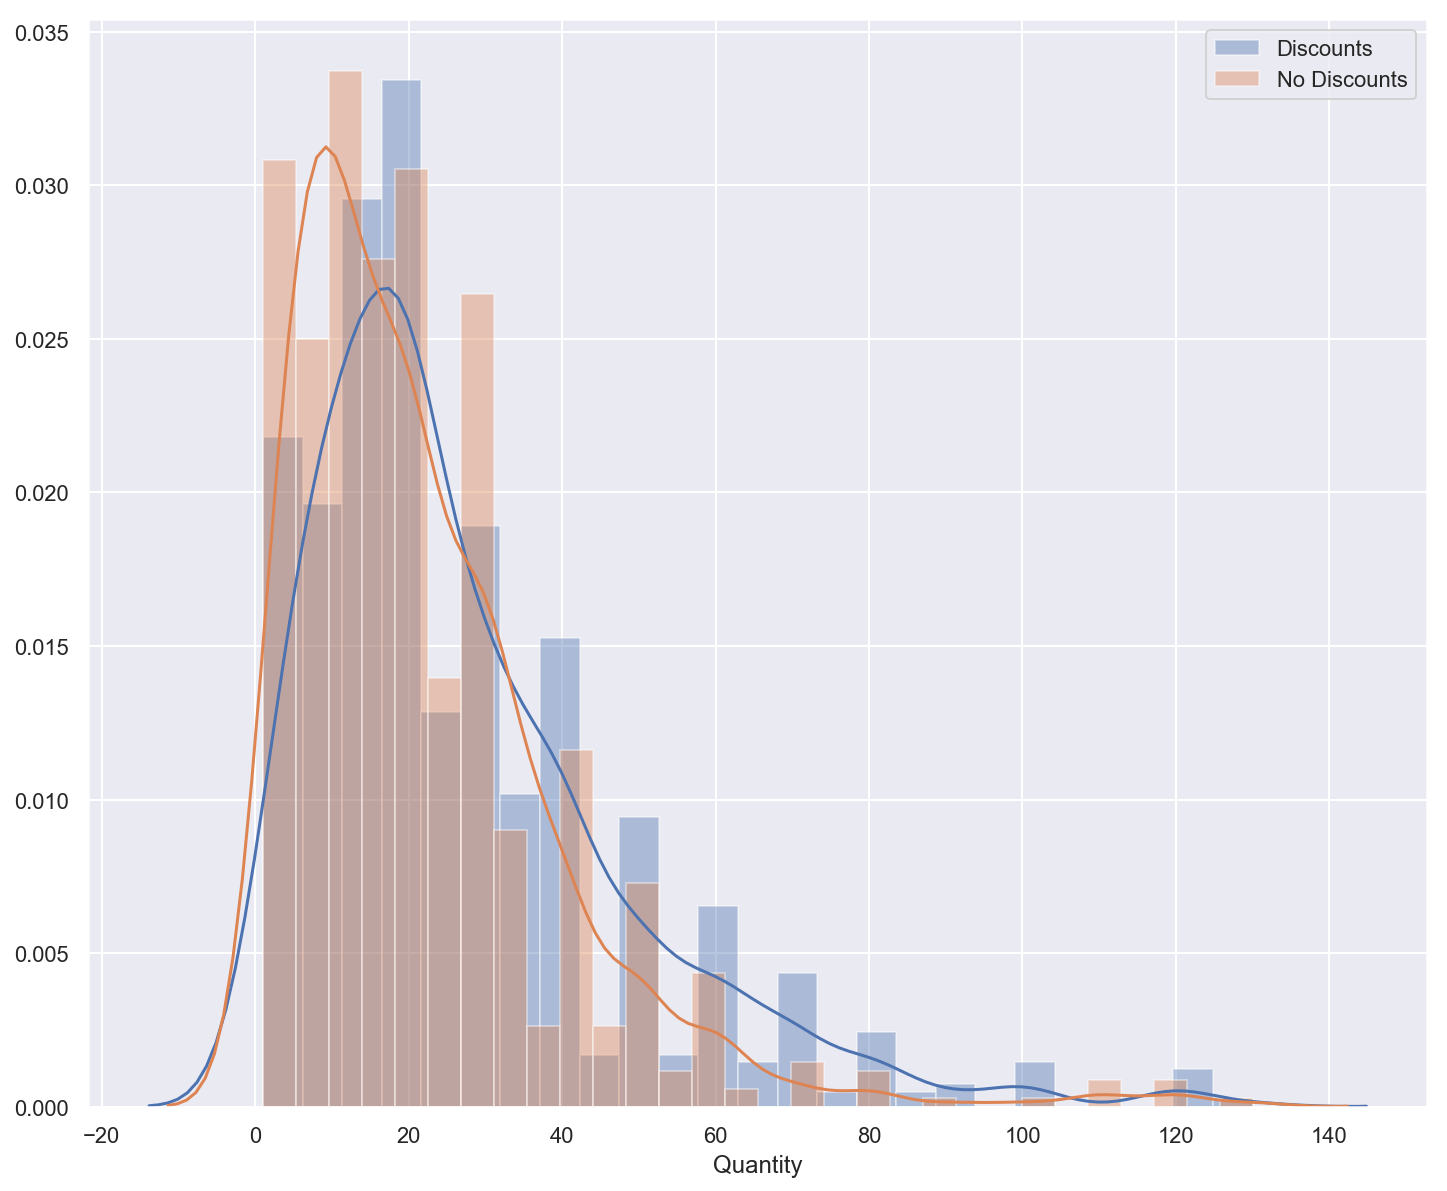

In [48]:

sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(test_samp, label='Discounts')
sns.distplot(control_samp, label='No Discounts') 
plt.legend()
plt.show();

In [49]:
#Two Sample T Test

numer = abs(mu_0 - mu_1)
denom = np.sqrt(sample_var * ((1/len(test_samp)+len(control_samp))))
denom2 = None
twosamp_ttest_stat = numer/denom
twosamp_ttest_stat



0.009601210541218848

In [50]:
#2nd attempt at 2 Sample T Test

mu1 = test_samp.mean()
mu2 = control_samp.mean()
std1 = test_samp.std(ddof=1)
std2 = control_samp.std(ddof=1)
n1 = len(test_samp)
n2 = len(control_samp)

num = (n1-1)*std1**2 + (n2-1)*std2**2
den = n1 + n2 - 2
pooled_std = np.sqrt(num/den)
pooled_std

19.501284636449977

In [51]:
se = pooled_std*np.sqrt((n2+n1)/(n1*n2))
se

0.9750642318224989

In [52]:
t = ((mu1-mu2)/se)
t

5.849614634452423

In [53]:

## Calculate p_value
# Lower tail comulative density function returns area under the lower tail curve

#Comulative density function returns area under upper tail curve
p_value = 1. - st.t.cdf(t, ((len(test_samp)+len(control_samp))-2), 0, 1)
print(p_value)

if p_value < 0.05:
    print(" HA = mu0 < H0: We reject the Null.")
else:
    print(" H0 = mu0 == HA: We fail to reject the Null.")

#stats.t.sf(abs(t_stat), len(experimental)+len(control)-1) * 2

2.9822579961091833e-09
 HA = mu0 < H0: We reject the Null.


In [54]:
The probability of rejecting the H0 when it would be true is only 00.55%

SyntaxError: invalid syntax (<ipython-input-54-4328830632ad>, line 1)

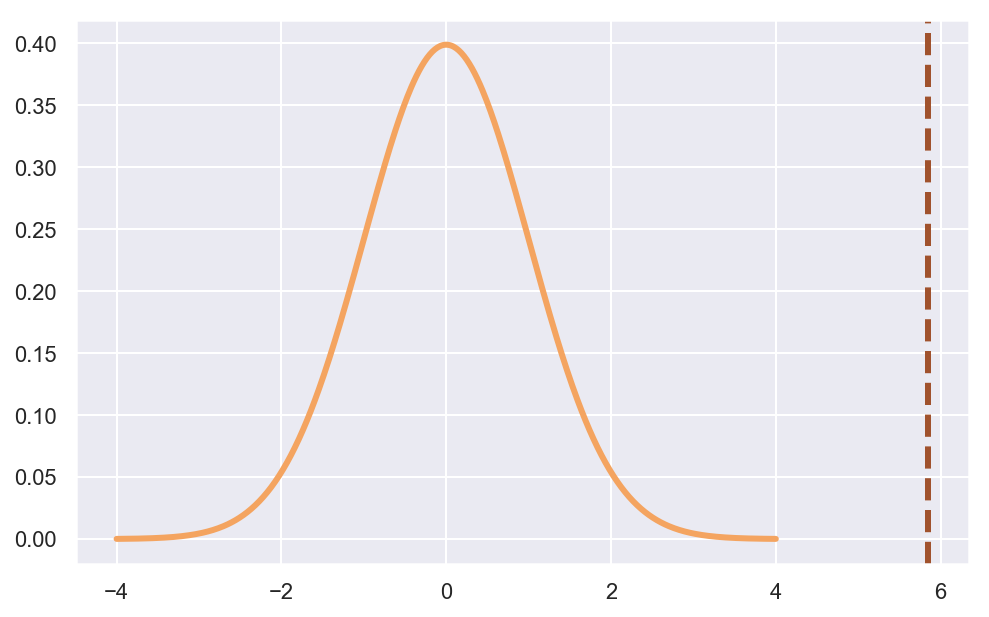

In [57]:
# Visualize p_value
%store -r colors
def visualize_t(t_stat, n_control, n_experimental):

    # initialize a matplotlib figure
    fig = plt.figure(figsize=(8,5))
    ax = fig.gca()
    # generate standard deviation spread: -4 and 4:
    xs = np.linspace(-4, 4, 500)

    # use stats.t.pdf to get values on the probability density function for the t-distribution
    
    ys= st.t.pdf(xs, (n_control+n_experimental-2), 0, 1)
    ax.plot(xs, ys, linewidth=3, color=colors[np.random.randint(len(colors))])

    ax.axvline(t_stat, color=colors[np.random.randint(len(colors))], linestyle='--', lw=3)

    plt.show()
    return None

n_control = len(control_samp)
n_experimental = len(test_samp)
visualize_t(t, n_control, n_experimental)

Text(0, 0.02, 'Type 2 Error')

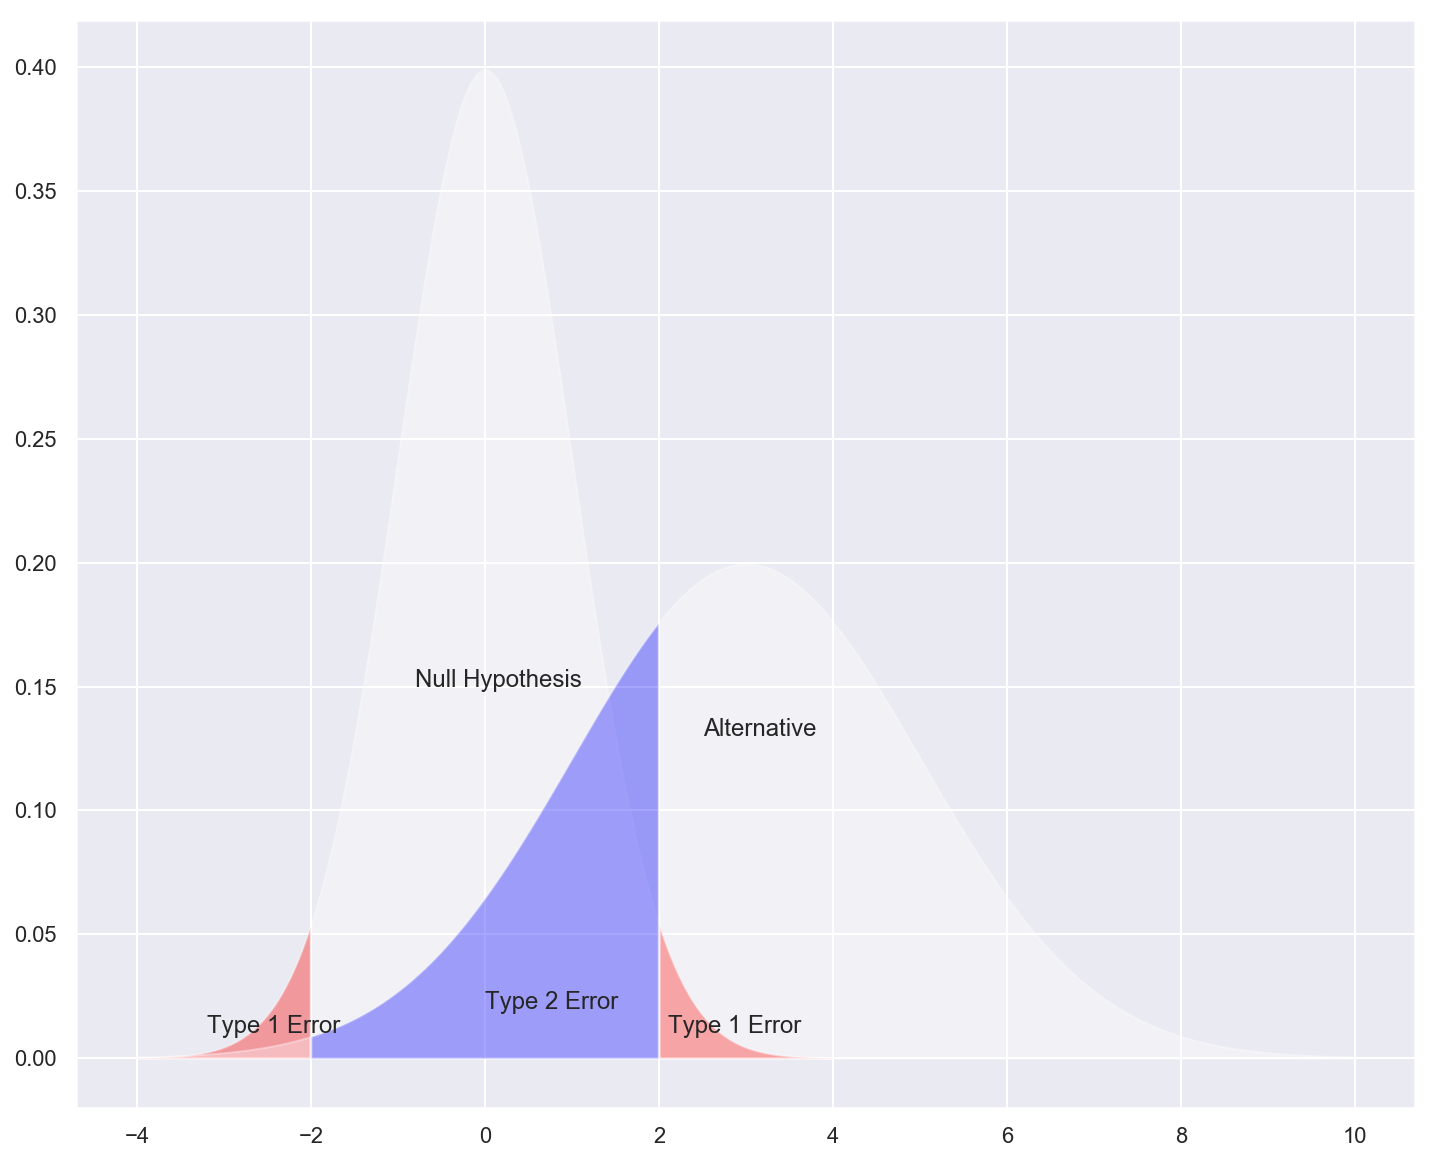

In [149]:
plt.figure(figsize=(12,10))

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= st.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= st.norm.pdf(np.arange(-2,2,0.01)) ,
                 facecolor='white',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01), 
                 y1= st.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= st.norm.pdf(np.arange(-4,-2,0.01),loc=3, scale=2) ,
                 facecolor='white',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= st.norm.pdf(np.arange(-2,2,0.01),loc=3, scale=2) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,10,0.01), 
                 y1= st.norm.pdf(np.arange(2,10,0.01),loc=3, scale=2),
                 facecolor='white',
                 alpha=0.35)

plt.text(x=-0.8, y=0.15, s= "Null Hypothesis")
plt.text(x=2.5, y=0.13, s= "Alternative")
plt.text(x=2.1, y=0.01, s= "Type 1 Error")
plt.text(x=-3.2, y=0.01, s= "Type 1 Error")
plt.text(x=0, y=0.02, s= "Type 2 Error")

### Summary
There is enough evidence to support the claim that orders with discounts are placed with a larger quantity than orders without discounts.

We fail to accept the null, which discount is statistically significant and at what lv? 1% 10% 25% etc.

*H0i == HAi vs H0i < HAi where i is the each of the discount levels compared to no discounts*

In [58]:


discount_lvs = [0.15, 0.05, 0.2 , 0.25, 0.1 , 0.02, 0.03, 0.04, 0.06, 0.01]
experiments = []
for i in range(len(discount_lvs)):
    experiments.append(np.array(discounts['Quantity'][discounts['Discount'] == discount_lvs[i]]))
experiments

[array([ 35,  15,  15,  21,  25,  70,  15,  40,  15,  21,  70,  40,  80,
         50,  25,   9,  50,   6,  15,  20,  15,  20,  20,  20,  10,  18,
         21,  70,   4,  15,  10,  18,  45,  49,  24,  90,  40,  21,  40,
         35,   2,  35,  60,  42,  15,   7,  15,  15,  50,  50,  10,  10,
          9,   6,  12,  16,  16,  84,   8,  30,  30,  70,  24,  55, 100,
         48,  40,  20,  35,  18,  11,  28,  24,  10,   4,  30,  35,  36,
         13,  35,  80,  15,  24,  12,  15,  30,   8,  60,  30,  15,  42,
         20,  35,  28,   5,  40,  25,   2,  30,   3,  20,  20,  20,   4,
         20,  50,  20,   8,  30,  40,  60,  25,  18,  20,   4,  30, 100,
         65,  15,  20,  12,  20,  32,   8,  30,   6,  25,  12,  42,  10,
         40,  28,  25,  24,  20,   2,  12,  12,  20,  40,   6,  84,  60,
         65,  66,  15,  24,  24,   8,  36,  28,  40,  20,  30,  10,  30,
          2], dtype=int64),
 array([  6,  15,  40,  25,  12,  60,  20,  24,  15,  60,  33,  12,   6,
         10,   8,  20, 

In [59]:
discounts[discounts['Discount'] == 0.02]

,Discount,Quantity,UnitPrice,OrderId,CustomerId
826,0.02,1,25.0,11077,RATTC
834,0.02,3,12.0,11077,RATTC


We can exclude the discount levels of [02%, 03%, 04%, 06%, 01%] from further testing <br> their sample sizes are less than 5.

In [60]:
discount_lvs = discount_lvs[:5]
experiments = experiments[:5]

for i in range(len(discount_lvs)):
    print(f'Sample size for discounts at the level of {discount_lvs[i]} == {len(experiments[i])}')


Sample size for discounts at the level of 0.15 == 157
Sample size for discounts at the level of 0.05 == 185
Sample size for discounts at the level of 0.2 == 161
Sample size for discounts at the level of 0.25 == 154
Sample size for discounts at the level of 0.1 == 173


In [127]:
controls = []
for i in range(len(discount_lvs)):
    controls.append(np.array(no_discounts['Quantity'].sample(len(experiments[i]))))
print(len(controls[0]),len(experiments[0]))

157 157


In [128]:
'''
discount_samp = discounts.sample(1300)
no_discount_samp = no_discounts.sample(1300)

control_samp = no_discount_samp['Quantity']
'''
controls[1]

array([ 20,   2,  15,   5,  45,   5,  20,  40,  24,  25,  25,  30,   5,
         1,   5,  14,  40,  30,  10,  10,  50,  15,  20,   3,  15,   4,
         5,  15,   6,  20,  30,  20,  15,  39,  15,  10,  12,  14,  20,
        49,  21,  10,  12,   6,   4,  15,  30,  10,  18,   3,  20,  35,
        28,  30,  45,  10,   1,  10,   8,  40,   4,  60,  20,   3,   8,
        20,   6,  28,  10,  15,  30, 110,  10,  42,  10,  30,  15,  15,
        12,  48,  12,  15,  24,  10,  24,  40,  40,  36,  15,  25,  21,
        28,  35,  30,  20,  20,  20,   4,  14,  50,  30,  30,   5,  45,
         2,  25,  12,  30,  40,  24,  21,  10,   6,  24,  60,  20,  20,
        20,  65,   6,  22,  25,   3,  70,  20,   9,  80,  30,  30,  10,
        20,  15,  10,   5,  10,   3,   6,  30,  15,  50,   2,  60,   3,
        20,  10,  30,   6,   3,  20,  25,  10,  15,   3,  50,   9,   4,
        80,  20,  16,  30,  14,  20,  20,  21,  15,  60,  48,  10,  35,
         5,  12,   9,   5,   3,  14,  30,   5,  25,  24,  20,  3

In [129]:
from scipy.stats import ttest_ind
for i in range(len(discount_lvs)):
    tstat, p_val = ttest_ind(experiments[i], controls[i])
    print(f'for Discount Level {discount_lvs[i]}, P Value = {p_val}')

for Discount Level 0.15, P Value = 0.003741864179304593
for Discount Level 0.05, P Value = 0.0015807978711013914
for Discount Level 0.2, P Value = 0.0004766779394296078
for Discount Level 0.25, P Value = 0.0006848646041803073
for Discount Level 0.1, P Value = 0.049240230172328064


By looking at this we can tell that the P Value for discounts of 20% have the smallest P values.  We can infer that it means the 20% discounts have the largest quantity.  Lets visualize this another way.

# Best Shipper

### H1 Speedy Express  ships orders with a higher dollar value than the competitors with a confidence level of 95%

### H0: there is no significant difference between Speedy Express and the other shippers

 Additionally, if we fail to accept the H0 ~ is ?? more effective by totaling UnitPrice of total orders / Freight
 


In [63]:
tables

[('Employee',),
 ('Category',),
 ('Customer',),
 ('Shipper',),
 ('Supplier',),
 ('Order',),
 ('Product',),
 ('OrderDetail',),
 ('CustomerCustomerDemo',),
 ('CustomerDemographic',),
 ('Region',),
 ('Territory',),
 ('EmployeeTerritory',)]

In [64]:
#the three shippers
c.execute('''select * from shipper;''')
c.fetchall()

[(1, 'Speedy Express', '(503) 555-9831'),
 (2, 'United Package', '(503) 555-3199'),
 (3, 'Federal Shipping', '(503) 555-9931')]

In [65]:
#frieght and shipper cooresponding to each of the three shippers by ID
c.execute('''select freight, shipvia from 'order'; ''')
c.fetchall()

[(32.38, 3),
 (11.61, 1),
 (65.83, 2),
 (41.34, 1),
 (51.3, 2),
 (58.17, 2),
 (22.98, 2),
 (148.33, 3),
 (13.97, 2),
 (81.91, 3),
 (140.51, 1),
 (3.25, 3),
 (55.09, 1),
 (3.05, 2),
 (48.29, 3),
 (146.06, 3),
 (3.67, 3),
 (55.28, 1),
 (25.73, 3),
 (208.58, 1),
 (66.29, 3),
 (4.56, 1),
 (136.54, 1),
 (4.54, 2),
 (98.03, 2),
 (76.07, 3),
 (6.01, 1),
 (26.93, 1),
 (13.84, 3),
 (125.77, 3),
 (92.69, 2),
 (25.83, 2),
 (8.98, 1),
 (2.94, 1),
 (12.69, 1),
 (84.81, 3),
 (76.56, 1),
 (76.83, 2),
 (229.24, 3),
 (12.76, 3),
 (7.45, 1),
 (22.77, 3),
 (79.7, 1),
 (6.4, 2),
 (1.35, 2),
 (21.18, 3),
 (147.26, 2),
 (1.15, 2),
 (0.12, 1),
 (5.74, 2),
 (168.22, 2),
 (29.76, 2),
 (17.68, 2),
 (45.08, 2),
 (6.27, 2),
 (107.83, 2),
 (63.79, 2),
 (257.62, 3),
 (7.56, 3),
 (0.56, 2),
 (1.61, 3),
 (47.3, 1),
 (17.52, 2),
 (24.69, 3),
 (40.26, 2),
 (1.96, 2),
 (74.16, 2),
 (41.76, 2),
 (150.15, 3),
 (12.69, 1),
 (4.73, 2),
 (64.5, 3),
 (34.57, 3),
 (3.43, 2),
 (0.4, 3),
 (4.88, 1),
 (214.27, 1),
 (64.86, 3),
 (

In [66]:
#join unitprice form order details to shippers
c.execute('''select CompanyName, ShipVia, Freight, OrderID, UnitPrice, Quantity, Discount
            from OrderDetail, 'Order', Shipper; ''')

c.fetchall()

[('Speedy Express', 3, 32.38, 10248, 14, 12, 0.0),
 ('United Package', 3, 32.38, 10248, 14, 12, 0.0),
 ('Federal Shipping', 3, 32.38, 10248, 14, 12, 0.0),
 ('Speedy Express', 1, 11.61, 10248, 14, 12, 0.0),
 ('United Package', 1, 11.61, 10248, 14, 12, 0.0),
 ('Federal Shipping', 1, 11.61, 10248, 14, 12, 0.0),
 ('Speedy Express', 2, 65.83, 10248, 14, 12, 0.0),
 ('United Package', 2, 65.83, 10248, 14, 12, 0.0),
 ('Federal Shipping', 2, 65.83, 10248, 14, 12, 0.0),
 ('Speedy Express', 1, 41.34, 10248, 14, 12, 0.0),
 ('United Package', 1, 41.34, 10248, 14, 12, 0.0),
 ('Federal Shipping', 1, 41.34, 10248, 14, 12, 0.0),
 ('Speedy Express', 2, 51.3, 10248, 14, 12, 0.0),
 ('United Package', 2, 51.3, 10248, 14, 12, 0.0),
 ('Federal Shipping', 2, 51.3, 10248, 14, 12, 0.0),
 ('Speedy Express', 2, 58.17, 10248, 14, 12, 0.0),
 ('United Package', 2, 58.17, 10248, 14, 12, 0.0),
 ('Federal Shipping', 2, 58.17, 10248, 14, 12, 0.0),
 ('Speedy Express', 2, 22.98, 10248, 14, 12, 0.0),
 ('United Package', 2,

The following Pandas tables include the information needed to test the hypothesis and additional information that might be required to test additional dependant hypotheses.

In [67]:
shippers = pd.read_sql_query('''select CompanyName, ShipVia, Freight, OrderID, UnitPrice, Quantity, Discount
            from OrderDetail d inner join 'Order' o on d.OrderID=o.Id inner join Shipper s on o.shipvia=s.Id; ''', cnx)
shippers['OrderTotal'] = (shippers['UnitPrice'] * shippers['Quantity']) * (1 - shippers['Discount'])

shippers[:10]

,CompanyName,ShipVia,Freight,OrderId,UnitPrice,Quantity,Discount,OrderTotal
0,Federal Shipping,3,32.38,10248,14.0,12,0.00,168.00
1,Federal Shipping,3,32.38,10248,9.8,10,0.00,98.00
2,Federal Shipping,3,32.38,10248,34.8,5,0.00,174.00
3,Speedy Express,1,11.61,10249,18.6,9,0.00,167.40
4,Speedy Express,1,11.61,10249,42.4,40,0.00,1696.00
5,United Package,2,65.83,10250,7.7,10,0.00,77.00
6,United Package,2,65.83,10250,42.4,35,0.15,1261.40
7,United Package,2,65.83,10250,16.8,15,0.15,214.20
8,Speedy Express,1,41.34,10251,16.8,6,0.05,95.76
9,Speedy Express,1,41.34,10251,15.6,15,0.05,222.30


In [68]:
shippers.isna().sum()

CompanyName    0
ShipVia        0
Freight        0
OrderId        0
UnitPrice      0
Quantity       0
Discount       0
OrderTotal     0
dtype: int64

In [69]:
shippers.shape

(2155, 8)

In [70]:

speedy = shippers[shippers['CompanyName'] == 'Speedy Express']
united = shippers[shippers['CompanyName'] == 'United Package']
federal = shippers[shippers['CompanyName'] == 'Federal Shipping']
speedy[:3]

,CompanyName,ShipVia,Freight,OrderId,UnitPrice,Quantity,Discount,OrderTotal
3,Speedy Express,1,11.61,10249,18.6,9,0.00,167.40
4,Speedy Express,1,11.61,10249,42.4,40,0.00,1696.00
8,Speedy Express,1,41.34,10251,16.8,6,0.05,95.76


In this test we will be comparing the experiemenal data from Speedy Express against united and federal both.

In [72]:
print(speedy.shape,united.shape,federal.shape)

(646, 8) (864, 8) (645, 8)


In [ ]:
### must we do this for tukey?###
#from statsmodels import pairwise_tukeyhsd
speedy_samp = speedy.sample(645)

In [ ]:
'''sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(test_samp, label='Discounts')
sns.distplot(control_samp, label='No Discounts') 
plt.legend()
plt.show();'''

# One Category to Rule Them All

### H1: Meat/Poultry is the most lucartive category  by total UnitPrice per order being al least 10 dollars more than other categories with a confidence of 95%
### H0: There is no significant difference between the Meat/Poultry and the other products.

Additionally, if we fail to accept the H0 ~ is Meat/Poultry accounted for with "proportionately" higher UnitsInStock/UnitsOnOrder compared to other like products?



In [73]:
tables

[('Employee',),
 ('Category',),
 ('Customer',),
 ('Shipper',),
 ('Supplier',),
 ('Order',),
 ('Product',),
 ('OrderDetail',),
 ('CustomerCustomerDemo',),
 ('CustomerDemographic',),
 ('Region',),
 ('Territory',),
 ('EmployeeTerritory',)]

In [74]:
c.execute('''select * from Category;''')
c.fetchall()

[(1, 'Beverages', 'Soft drinks, coffees, teas, beers, and ales'),
 (2,
  'Condiments',
  'Sweet and savory sauces, relishes, spreads, and seasonings'),
 (3, 'Confections', 'Desserts, candies, and sweet breads'),
 (4, 'Dairy Products', 'Cheeses'),
 (5, 'Grains/Cereals', 'Breads, crackers, pasta, and cereal'),
 (6, 'Meat/Poultry', 'Prepared meats'),
 (7, 'Produce', 'Dried fruit and bean curd'),
 (8, 'Seafood', 'Seaweed and fish')]

I had been getting a different unit price from the Product and the Order Detail tables.  I'm assuming the Order Detail is the most accurate unit price since it was more likely that that info was taken form the sale itself.

In [75]:
categories = pd.read_sql_query('''select productname, CategoryName, d.unitprice, quantity, discount, unitsinstock, unitsonorder, discontinued
                            from OrderDetail d inner join Product p on d.ProductId = p.Id
                            join category c on p.categoryid = c.id;''', cnx)
print(f'Shape: \n {categories.shape} \n NaNs: \n{categories.isna().sum()}')

meats = pd.read_sql_query('''select productname, CategoryName, d.unitprice, quantity, discount, unitsinstock, unitsonorder, discontinued
                            from OrderDetail d inner join Product p on d.ProductId = p.Id
                            join category c on p.categoryid = c.id
                            where CategoryName = 'Meat/Poultry';''', cnx)
not_meats = pd.read_sql_query('''select productname, CategoryName, d.unitprice, quantity, discount, unitsinstock, unitsonorder, discontinued
                            from OrderDetail d inner join Product p on d.ProductId = p.Id
                            join category c on p.categoryid = c.id
                            where CategoryName != 'Meat/Poultry';''', cnx)


Shape: 
 (2155, 8) 
 NaNs: 
ProductName     0
CategoryName    0
UnitPrice       0
Quantity        0
Discount        0
UnitsInStock    0
UnitsOnOrder    0
Discontinued    0
dtype: int64


In [76]:
meats['Order Total'] = (meats['UnitPrice'] * (1-meats['Discount'])) * meats['Quantity']
not_meats['Order Total'] = (not_meats['UnitPrice'] * (1-not_meats['Discount'])) * not_meats['Quantity']
meats[:2]

,ProductName,CategoryName,UnitPrice,Quantity,Discount,UnitsInStock,UnitsOnOrder,Discontinued,Order Total
0,Pâté chinois,Meat/Poultry,19.2,21,0.15,115,0,0,342.72
1,Perth Pasties,Meat/Poultry,26.2,15,0.00,0,0,1,393.00


In [77]:
print(meats.shape,not_meats.shape)

(173, 9) (1982, 9)


In [78]:
exp_sample = meats['Order Total'].sample(173)
ctrl_sample = not_meats['Order Total'].sample(173)

exp_mean = exp_sample.mean()
ctrl_mean = ctrl_sample.mean()
exp_sd = np.std(exp_sample)
ctrl_sd = np.std(ctrl_sample)
print(f'experiement mean and sd: \n {exp_mean} , {exp_sd}\ncontrol mean and sd: \n {ctrl_mean} , {ctrl_sd}')

experiement mean and sd: 
 942.3257774566473 , 1292.9936174957313
control mean and sd: 
 581.4606734104045 , 897.2141391525993


C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


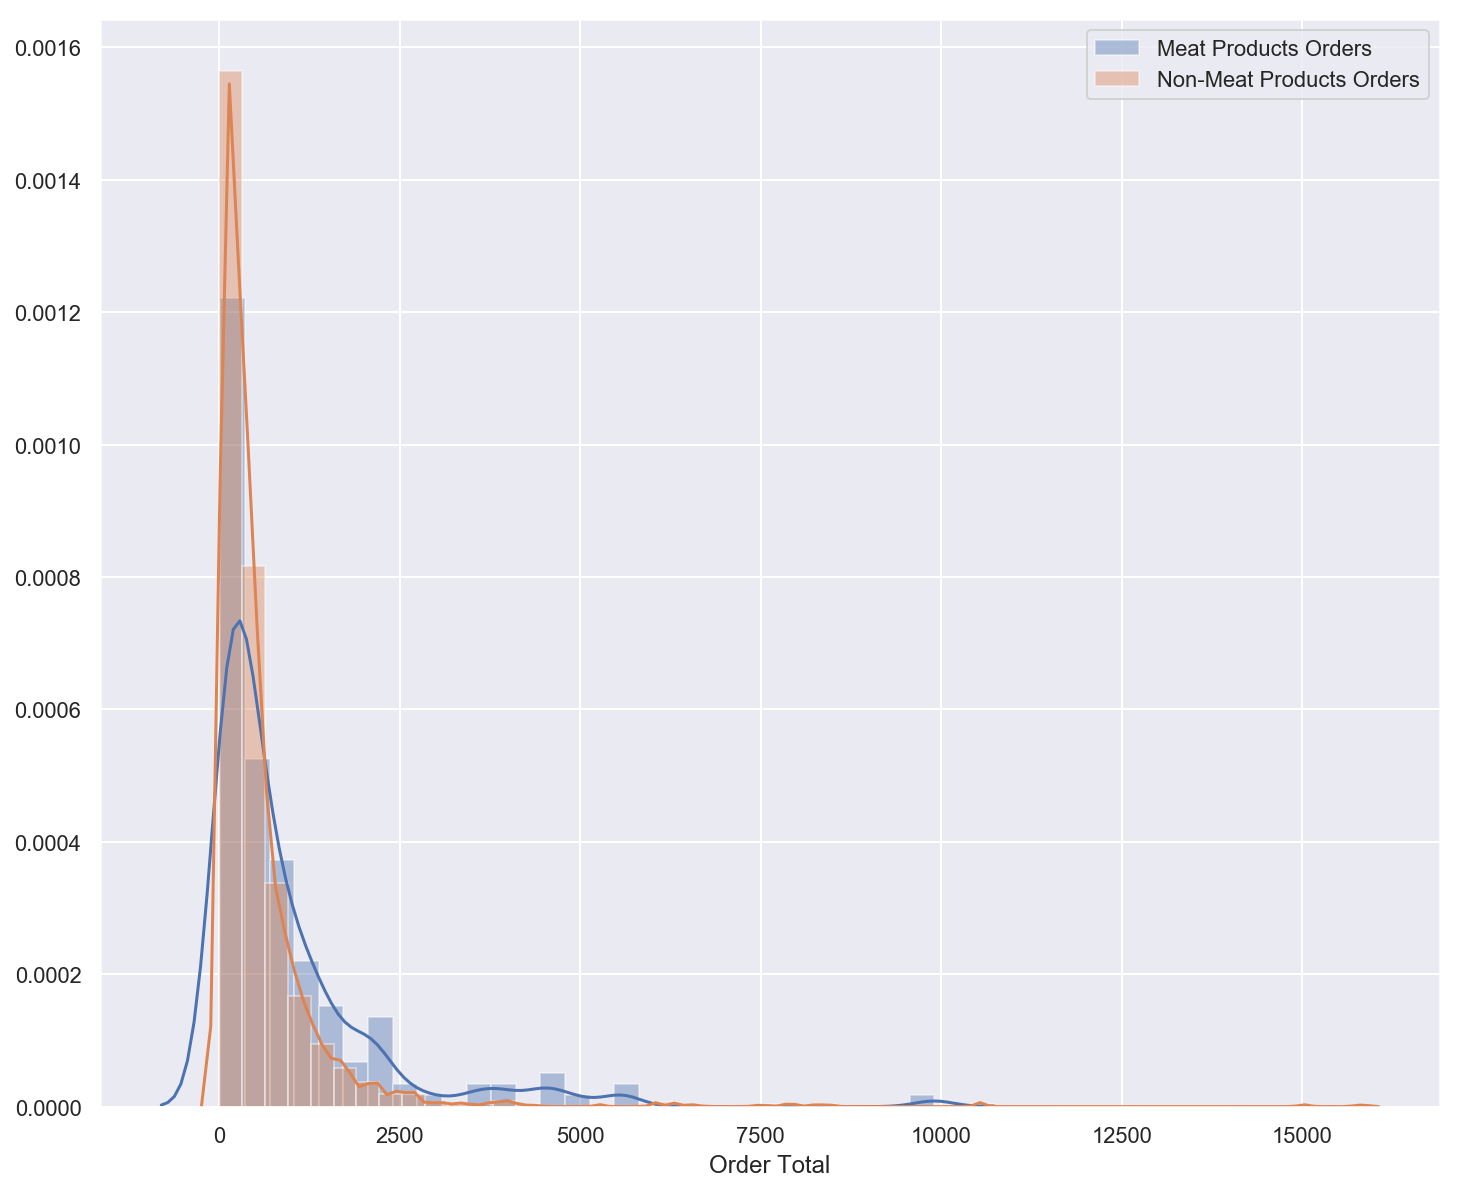

In [79]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(meats['Order Total'], label='Meat Products Orders')
sns.distplot(not_meats['Order Total'], label='Non-Meat Products Orders') 
plt.legend()
plt.show();

In [80]:
###Need Jeff's Help###

mu1 = exp_sample.mean()
sd1 = exp_sample.std(ddof=1)
mu2 = ctrl_sample.mean()
sd2 = ctrl_sample.std(ddof=1)
n1 = len(exp_sample)
n2 = len(ctrl_sample)


num = (n1-1)*sd1**2 + (n2-1)*sd2**2
denom = n1 + n2 -2
pooled_sd = np.sqrt(num/denom)
sd1

1296.7468724659823

In [81]:
se = pooled_std*np.sqrt((n2+n1)/(n1*n2))
se

2.0967911141916504

In [82]:
t = (((mu1 - mu2)-10) / se)
t

167.33431464464564

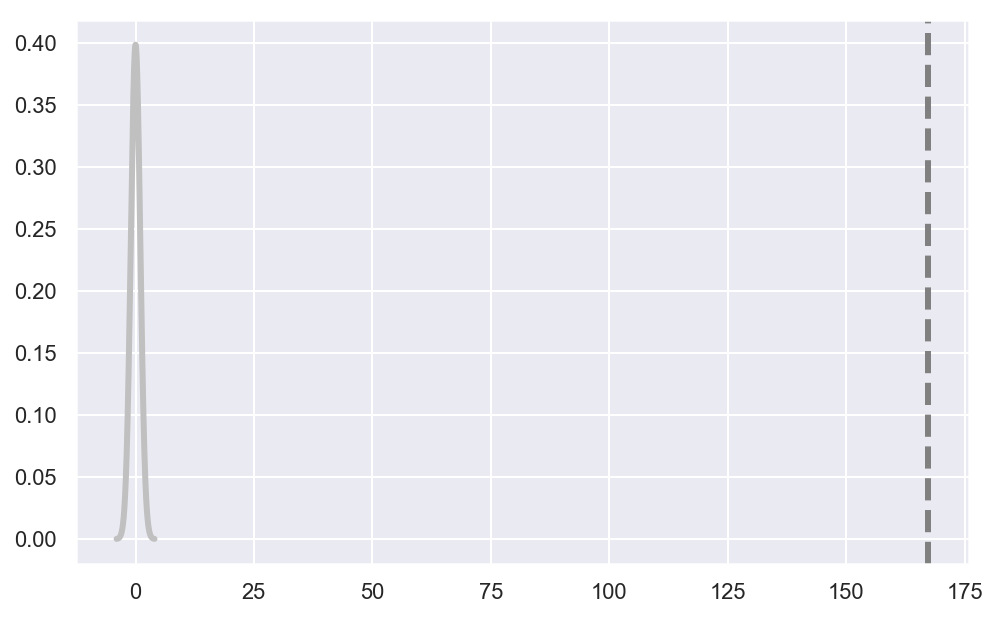

In [84]:
def visualize_t(t_stat, n_control, n_experimental):

    # initialize a matplotlib figure
    fig = plt.figure(figsize=(8,5))
    ax = fig.gca()
    # generate standard deviations: -4 and 4:
    xs = np.linspace(-4, 4, 500)

    # use stats.t.pdf to get values on the probability density function for the t-distribution
    
    ys= st.t.pdf(xs, (n_control+n_experimental-2), 0, 1)
    ax.plot(xs, ys, linewidth=3, color=colors[np.random.randint(len(colors))])

    ax.axvline(t_stat, color=colors[np.random.randint(len(colors))], linestyle='--', lw=3)

    plt.show()
    return None

n_control = len(ctrl_sample)
n_experimental = len(exp_sample)
visualize_t(t, n_control, n_experimental)

In [85]:
from scipy.stats import ttest_ind
tstat, p_val = ttest_ind(exp_sample, ctrl_sample)
p_val

0.0028307742575623142

### Non-Parametric

In [131]:
first_diff = (meats['Order Total'].mean() - not_meats['Order Total'].mean()) - 10
first_diff

ten_dollars_diff = 10

In [132]:
###Need Jeff's Help###

total_diffs = []
for i in range(10000):
    exp_sample = meats['Order Total'].sample(150)
    ctrl_sample = not_meats['Order Total'].sample(150)
    diff = exp_sample.mean() - ctrl_sample.mean()
    total_diffs.append(diff)


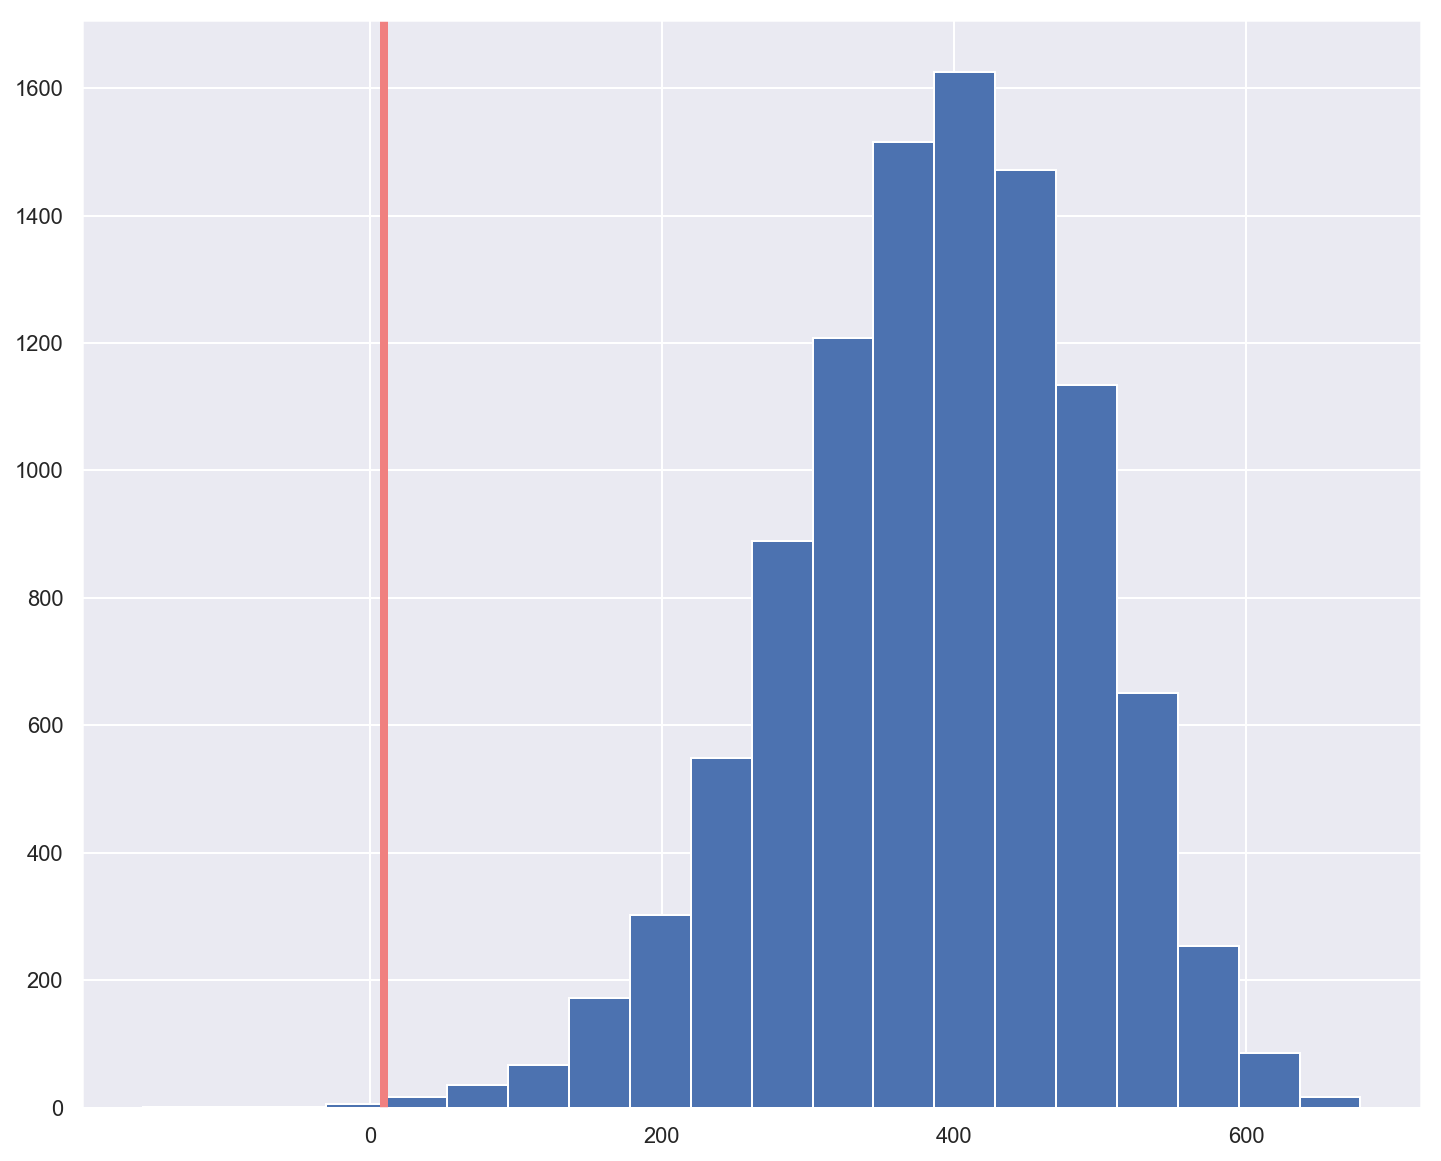

In [134]:

plt.hist(total_diffs, bins=20)
plt.axvline(ten_dollars_diff, c=colors[np.random.randint(len(colors))], lw=4)

In [145]:

count = 0
for diff in total_diffs:
    if diff >= ten_dollars_diff:
        count += 1
print(f'{count} out of 1000 tests have orders of meat that are higher in price.\n{count / len(total_diffs)}')
ttest, p_val = st.ttest_ind(exp_sample, ctrl_sample)
print(p_val)

9992 out of 1000 tests have orders of meat that are higher in price.
0.9992
0.5094675054617899


### Summary
There is enough evidence to support the claim that orders on meats are placed with a larger order price than other categories, even by $10.

We fail to accept the null hypothesis and accept the alternative that meat orders bring in more money.

# Bread and Butter Region

### H1: The western region is the most profitable regionby quantity of products shipped with a confidence of 95%
### H0: There is no significant difference between the western region and the other regions.
 
 by 20%
 by 80%
    within the western region ~ San Francisco is the most profitable territory by 5% total UnitPrice
    by the same 80/20 rule


join region to territories by regionID to EmpolyeeTerritories by TerrirotyID to Employees by EmployeeID to Orders by EmpolyeeID to Order Details by OrderID

group by unitprice/quantity

again for each territory

In [89]:
tables

[('Employee',),
 ('Category',),
 ('Customer',),
 ('Shipper',),
 ('Supplier',),
 ('Order',),
 ('Product',),
 ('OrderDetail',),
 ('CustomerCustomerDemo',),
 ('CustomerDemographic',),
 ('Region',),
 ('Territory',),
 ('EmployeeTerritory',)]

The following are a few test calls on different tables in preperation for reaching across five tables to join region on order details.

In [90]:
c.execute('''select regiondescription from Region;''').fetchall()

[('Eastern',), ('Western',), ('Northern',), ('Southern',)]

In [91]:
c.execute('''select territorydescription from Territory order by TerritoryDescription desc;''').fetchall()

[('Wilton',),
 ('Westboro',),
 ('Troy',),
 ('Tampa',),
 ('Southfield',),
 ('Seattle',),
 ('Scottsdale',),
 ('Savannah',),
 ('Santa Monica',),
 ('Santa Cruz',),
 ('Santa Clara',),
 ('San Francisco',),
 ('Roseville',),
 ('Rockville',),
 ('Redmond',),
 ('Racine',),
 ('Providence',),
 ('Portsmouth',),
 ('Phoenix',),
 ('Philadelphia',),
 ('Orlando',),
 ('Neward',),
 ('New York',),
 ('New York',),
 ('Morristown',),
 ('Minneapolis',),
 ('Menlo Park',),
 ('Mellvile',),
 ('Louisville',),
 ('Hollis',),
 ('Hoffman Estates',),
 ('Greensboro',),
 ('Georgetow',),
 ('Findlay',),
 ('Fairport',),
 ('Edison',),
 ('Denver',),
 ('Dallas',),
 ('Columbia',),
 ('Colorado Springs',),
 ('Chicago',),
 ('Cary',),
 ('Campbell',),
 ('Cambridge',),
 ('Braintree',),
 ('Boston',),
 ('Bloomfield Hills',),
 ('Bentonville',),
 ('Bellevue',),
 ('Bedford',),
 ('Beachwood',),
 ('Austin',),
 ('Atlanta',)]

In [92]:
c.execute('''select region from Employee;''').fetchall()[:5]

[('North America',),
 ('North America',),
 ('North America',),
 ('North America',),
 ('British Isles',)]

In [93]:
c.execute('''select Territoryid from EmployeeTerritory;''').fetchall()[:5]

[('06897',), ('19713',), ('01581',), ('01730',), ('01833',)]

In [94]:
c.execute('''select shipcity from 'Order';''').fetchall()[:5]

[('Reims',), ('Münster',), ('Rio de Janeiro',), ('Lyon',), ('Charleroi',)]

In [95]:
c.execute('''select discount from 'OrderDetail';''').fetchall()[:5]
q = '''select * from 'Order'; '''
pd.read_sql_query(q, cnx)[:2]

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany


In [96]:
c.execute('''select discount from 'OrderDetail';''').fetchall()[:5]
q = '''select * from 'OrderDetail'; '''
pd.read_sql_query(q, cnx)[:2]

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0


The long join statement.

In [97]:
#Question for Jeff
c.execute('''select regiondescription, territorydescription, shipregion, shipcountry, unitprice, quantity, discount
            from region r join Territory t on r.id=t.regionid
            join EmployeeTerritory et on t.id=et.territoryid
            join Employee e on et.Employeeid=e.id
            join 'Order' o on e.id=o.employeeid
            join OrderDetail od on o.id=od.OrderId;''').fetchall()

[('Eastern', 'Providence', 'Western Europe', 'France', 14, 12, 0.0),
 ('Eastern', 'Morristown', 'Western Europe', 'France', 14, 12, 0.0),
 ('Eastern', 'Edison', 'Western Europe', 'France', 14, 12, 0.0),
 ('Eastern', 'New York', 'Western Europe', 'France', 14, 12, 0.0),
 ('Eastern', 'New York', 'Western Europe', 'France', 14, 12, 0.0),
 ('Eastern', 'Mellvile', 'Western Europe', 'France', 14, 12, 0.0),
 ('Eastern', 'Fairport', 'Western Europe', 'France', 14, 12, 0.0),
 ('Eastern', 'Providence', 'Western Europe', 'France', 9.8, 10, 0.0),
 ('Eastern', 'Morristown', 'Western Europe', 'France', 9.8, 10, 0.0),
 ('Eastern', 'Edison', 'Western Europe', 'France', 9.8, 10, 0.0),
 ('Eastern', 'New York', 'Western Europe', 'France', 9.8, 10, 0.0),
 ('Eastern', 'New York', 'Western Europe', 'France', 9.8, 10, 0.0),
 ('Eastern', 'Mellvile', 'Western Europe', 'France', 9.8, 10, 0.0),
 ('Eastern', 'Fairport', 'Western Europe', 'France', 9.8, 10, 0.0),
 ('Eastern', 'Providence', 'Western Europe', 'Franc

The following Pandas tables include the information needed to test the hypothesis and additional information that might be required to test additional dependant hypotheses.

In [98]:
q = '''select regiondescription, territorydescription, shipregion, shipcountry, unitprice, quantity, discount
            from region r join Territory t on r.id=t.regionid
            join EmployeeTerritory et on t.id=et.territoryid
            join Employee e on et.Employeeid=e.id
            join 'Order' o on e.id=o.employeeid
            join OrderDetail od on o.id=od.OrderId
            where RegionDescription == 'Western';'''
q2 = '''select regiondescription, territorydescription, shipregion, shipcountry, unitprice, quantity, discount
            from region r join Territory t on r.id=t.regionid
            join EmployeeTerritory et on t.id=et.territoryid
            join Employee e on et.Employeeid=e.id
            join 'Order' o on e.id=o.employeeid
            join OrderDetail od on o.id=od.OrderId
            where RegionDescription != 'Western';'''


west = pd.read_sql_query(q, cnx)
not_west = pd.read_sql_query(q2, cnx)
not_west.sample(5)

,RegionDescription,TerritoryDescription,ShipRegion,ShipCountry,UnitPrice,Quantity,Discount
4376,Eastern,Westboro,Western Europe,France,6.0,4,0.00
7286,Southern,Savannah,British Isles,UK,15.0,3,0.00
7136,Eastern,Georgetow,Western Europe,Belgium,18.0,60,0.00
2291,Northern,Southfield,Western Europe,Germany,14.0,18,0.10
1110,Eastern,Morristown,South America,Brazil,64.8,12,0.25


In [99]:
west['Order Total'] = (west['UnitPrice'] * (1-west['Discount'])) * west['Quantity']
not_west['Order Total'] = (not_west['UnitPrice'] * (1-not_west['Discount'])) * not_west['Quantity']


In [100]:
print(west.shape,not_west.shape)

west_samp = west['Quantity'].sample(2600)
ctrl_samp = not_west['Quantity'].sample(2600)

(2600, 8) (7529, 8)


C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


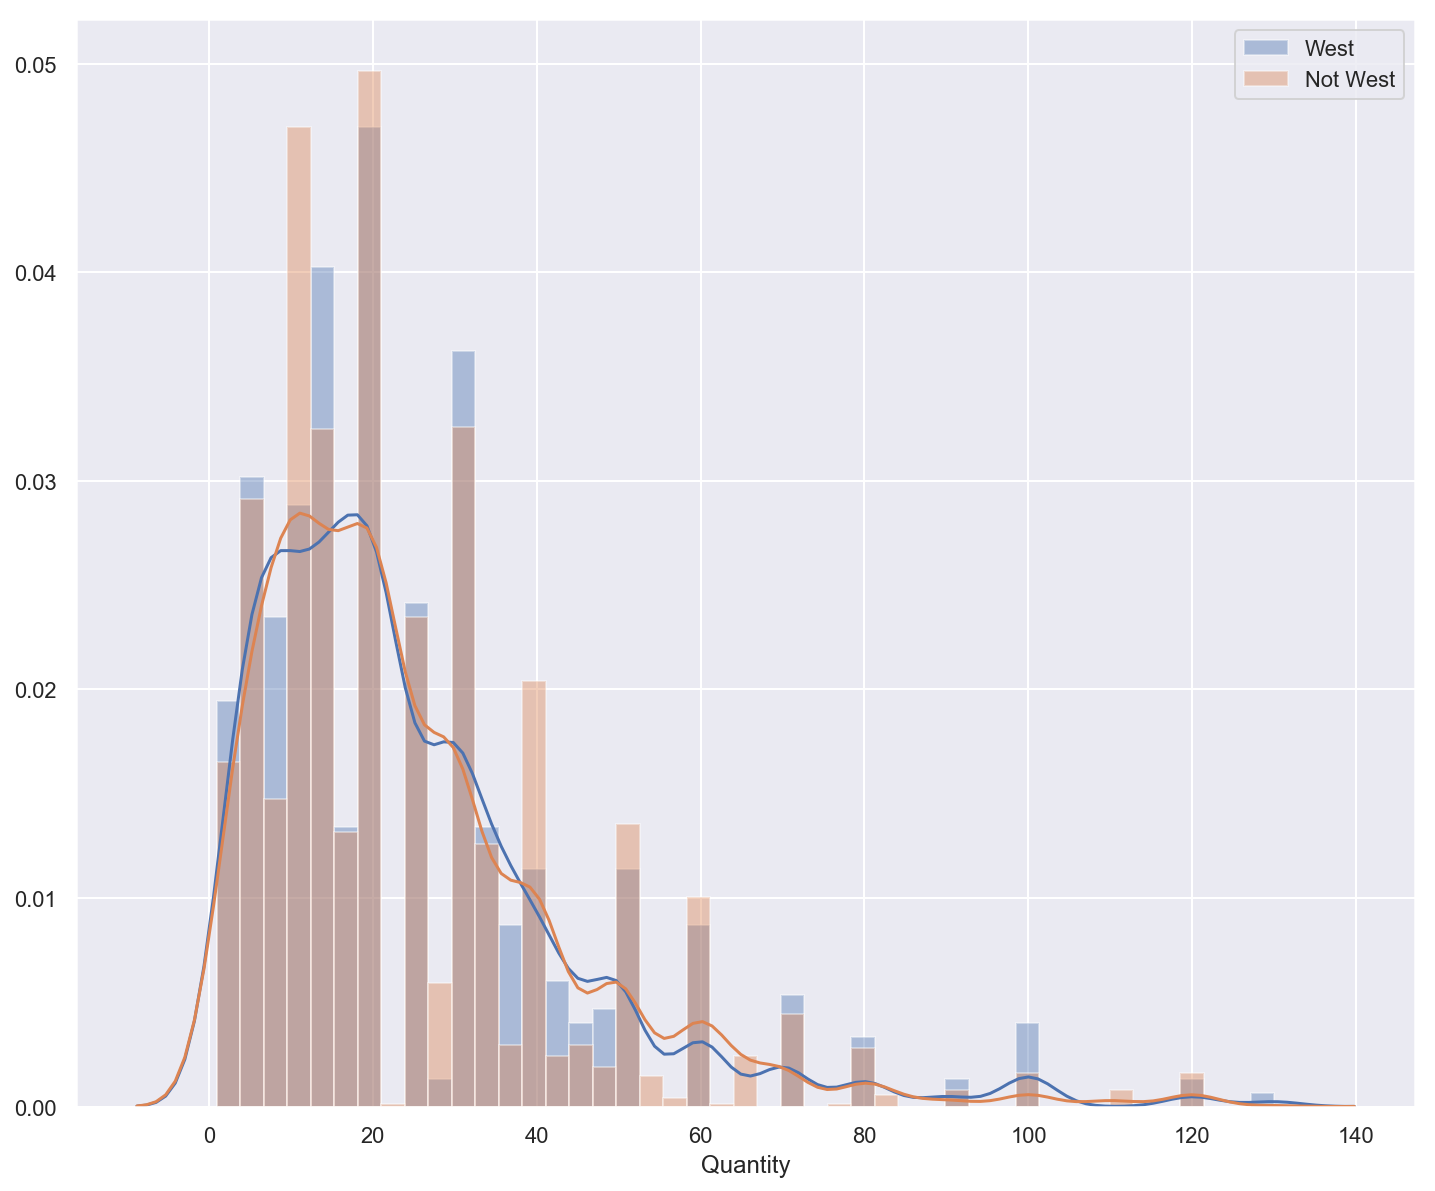

In [101]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(west_samp, label='West')
sns.distplot(ctrl_samp, label='Not West') 
plt.legend()
plt.show();

In [147]:
from scipy.stats import ttest_ind
tstat, p_val = ttest_ind(west_samp, ctrl_samp,  equal_var=False)
p_val

0.09614653019837845

In [104]:
west_mean, ctrl_mean = np.mean(west_samp), np.mean(ctrl_samp)
orig_diff = abs(west_mean - ctrl_mean)
orig_diff
no_diff = 0

In [105]:
region_diffs = []
for i in range(1000):
    west_samp = west['Quantity'].sample(2000)
    ctrl_samp = not_west['Quantity'].sample(2000)
    diff = (np.mean(west_samp) - np.mean(ctrl_samp))
    region_diffs.append(diff)

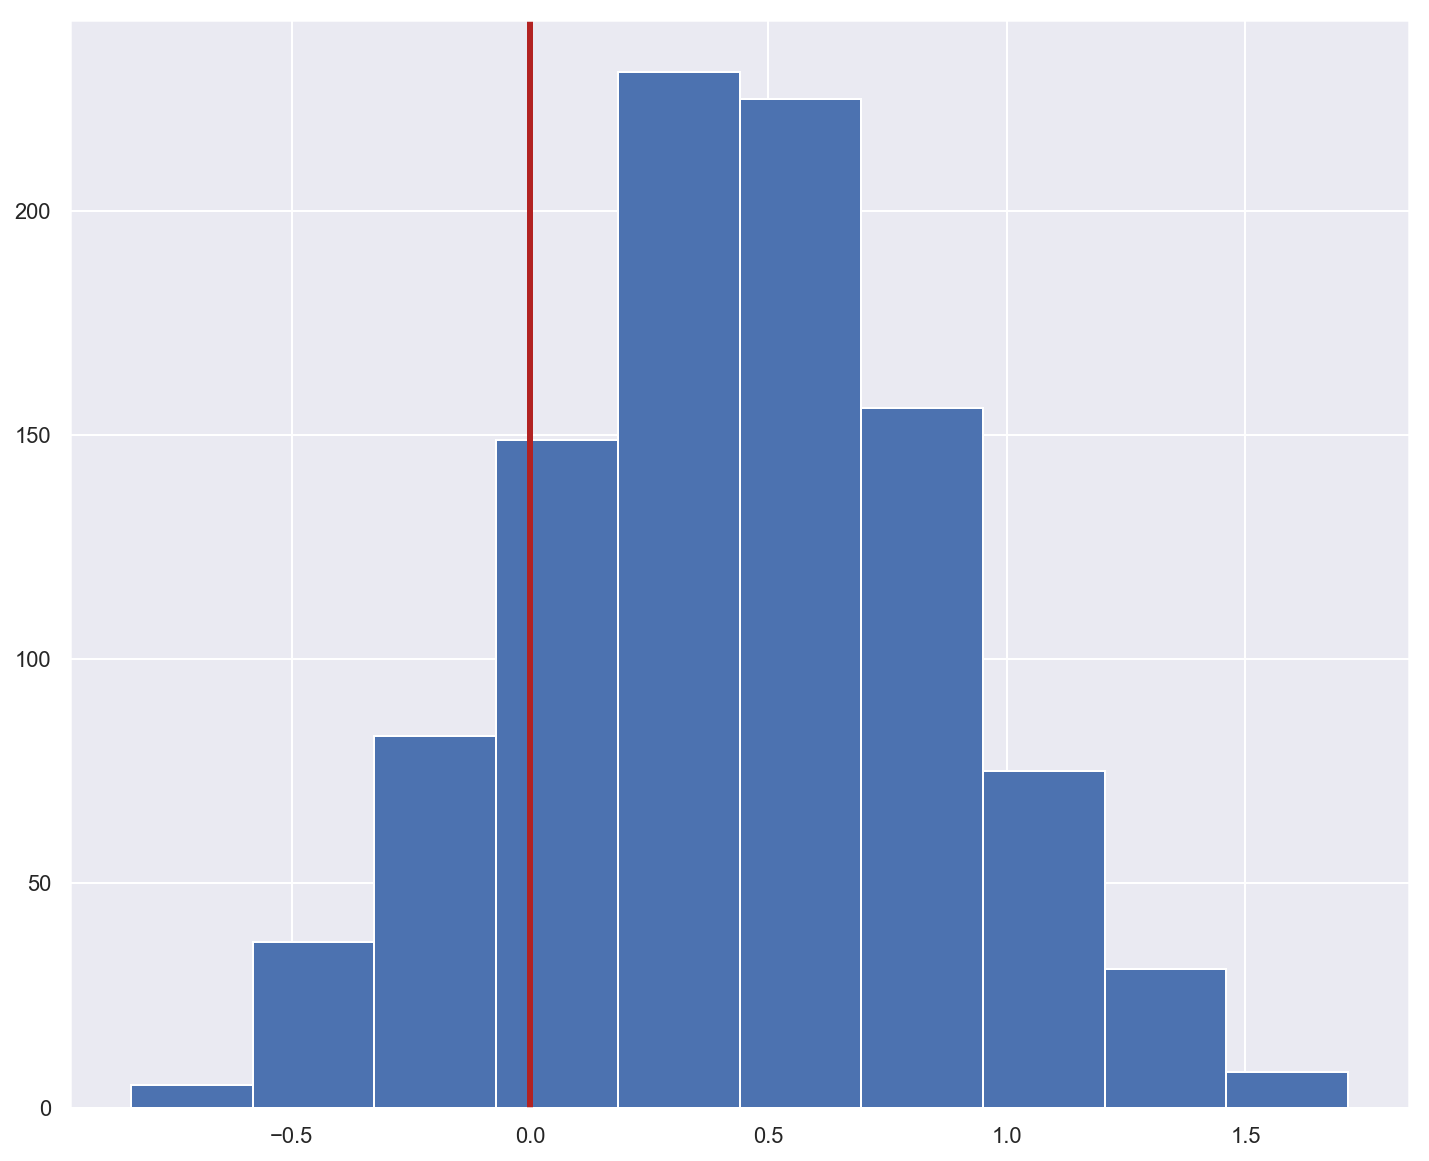

In [108]:
plt.hist(region_diffs)
plt.axvline(no_diff, c=colors[np.random.randint(len(colors))], lw = 3)

In [142]:
count = 0
for diff in region_diffs:
    if diff >= no_diff:
        count += 1
print(f'{count} out of 1000 tests have a higher quantity when shipping to SF.\nP-Value: {count / len(region_diffs)}')

852 out of 1000 tests have a higher quantity when shipping to SF.
P-Value: 0.852


In [116]:
from scipy.stats import ttest_ind

ttest, P_val = ttest_ind(west['Quantity'].values, not_west['Quantity'].values)
P_val

0.30205781258806796

### Summary

This P value is a little high.  Our informal test tells us that we are only shipping more products per order to San Fran 85% of the time.  While these results fail to reject the H0.  It might still be worth doing further tests regarding San Francisco.

In [ ]:
westcopy = west.copy()
westcopy['TerritoryDescription'].unique()

In [ ]:
cities_less_SF = ['Phoenix', 'Scottsdale', 'Bellevue', 'Redmond', 'Seattle',
       'Hoffman Estates', 'Chicago', 'Denver', 'Colorado Springs',
       'Santa Monica', 'Menlo Park', 'Campbell',
       'Santa Clara', 'Santa Cruz']
westcopy['TerritoryDescription'].replace('San Francisco', 1, inplace=True)
westcopy['TerritoryDescription'].replace(cities_less_SF,0, inplace=True)
westcopy['TerritoryDescription'].mean()